##Part 2: Fine-tuning Stable Diffusion

To train stable diffusion on our images, we can use a technique called fine-tuning, which involves taking a pre-trained stable diffusion model and training it further on a new dataset. In this way, we can leverage the knowledge already learned by the pre-trained model and adapt it to the new dataset, allowing us to achieve better performance with less training time. In this context, we will be fine-tuning a stable diffusion model on our own images, which will enable us to generate new images that are similar in style and content to our original dataset. Once we have fine-tuned the model, we will be able to use it for inference, generating new images on demand.

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 24873, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (241/241), done.
remote: Total 24873 (delta 306), reused 403 (delta 238), pack-reused 24367
Receiving objects: 100% (24873/24873), 31.35 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (17962/17962), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.16.0-py3-none-any.whl size=934833 sha256=bbdd29af342523baf275bdd086ac460b2a293c030a57e679422d69aac6d8dd62
  Stored in directory: /tmp/pip-ephem-wheel-cache-ekt59jxu/wheels/bd/1c/ea/a9c409b587aa6f3abca1bf1ce8eb592b2b541e5f26f5a4f44b
Successfully built d

Let's configure HuggingFace Accelerate, a platform for allowing us to automatically configure our system to be able to run our training script. You can learn more about Accelerate [here](https://huggingface.co/docs/accelerate/index).

In [ ]:
!nvidia-smi

Wed Apr 26 14:01:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    48W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!accelerate config default --mixed_precision fp16

2023-04-26 14:01:55.465478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


Time to configure our environment variables. For this, we want to tell the script our model name, dataset name, and where we would like it to output the model. We will be automatically pushing the model directly to HuggingFace Hub which will require us to login to our HuggingFace account using the token provided through your HuggingFace account settings.

In [ ]:
import os

os.environ['MODEL_NAME'] = f'CompVis/stable-diffusion-v1-2'
os.environ['DATASET_NAME'] = f'Ali-fb/ios_icons'
os.environ['OUTPUT_DIR'] = f'sd_aiconos-model-v1-2_400'

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Run our training script using HuggingFace accelerate. We'll be inputing our dataset and model with 400 steps (selected) and 134 epochs (default). The model will then be automatically pushed to the hub.

In [ ]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --push_to_hub \
  --checkpointing_steps=100000 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUTPUT_DIR 

Streaming output truncated to the last 5000 lines.

diffusion_pytorch_model.bin:  36% 1.24G/3.44G [01:51<03:20, 11.0MB/s]





diffusion_pytorch_model.bin:  36% 1.24G/3.44G [01:51<03:03, 12.0MB/s]





diffusion_pytorch_model.bin:  36% 1.24G/3.44G [01:51<03:14, 11.3MB/s]





diffusion_pytorch_model.bin:  36% 1.24G/3.44G [01:51<02:59, 12.2MB/s]





diffusion_pytorch_model.bin:  36% 1.25G/3.44G [01:52<02:51, 12.8MB/s]





diffusion_pytorch_model.bin:  36% 1.25G/3.44G [01:52<03:46, 9.68MB/s]





diffusion_pytorch_model.bin:  36% 1.25G/3.44G [01:52<03:26, 10.6MB/s]





diffusion_pytorch_model.bin:  36% 1.25G/3.44G [01:52<03:31, 10.3MB/s]





diffusion_pytorch_model.bin:  37% 1.26G/3.44G [01:53<03:02, 12.0MB/s]





diffusion_pytorch_model.bin:  37% 1.26G/3.44G [01:53<02:50, 12.8MB/s]





diffusion_pytorch_model.bin:  37% 1.26G/3.44G [01:53<03:06, 11.7MB/s]





diffusion_pytorch_model.bin:  37% 1.26G/3.44G [01:53<04:08, 8.76MB/s]





diffusion_pytorch_model.bin:  37% 1.27G/3.44G [0

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

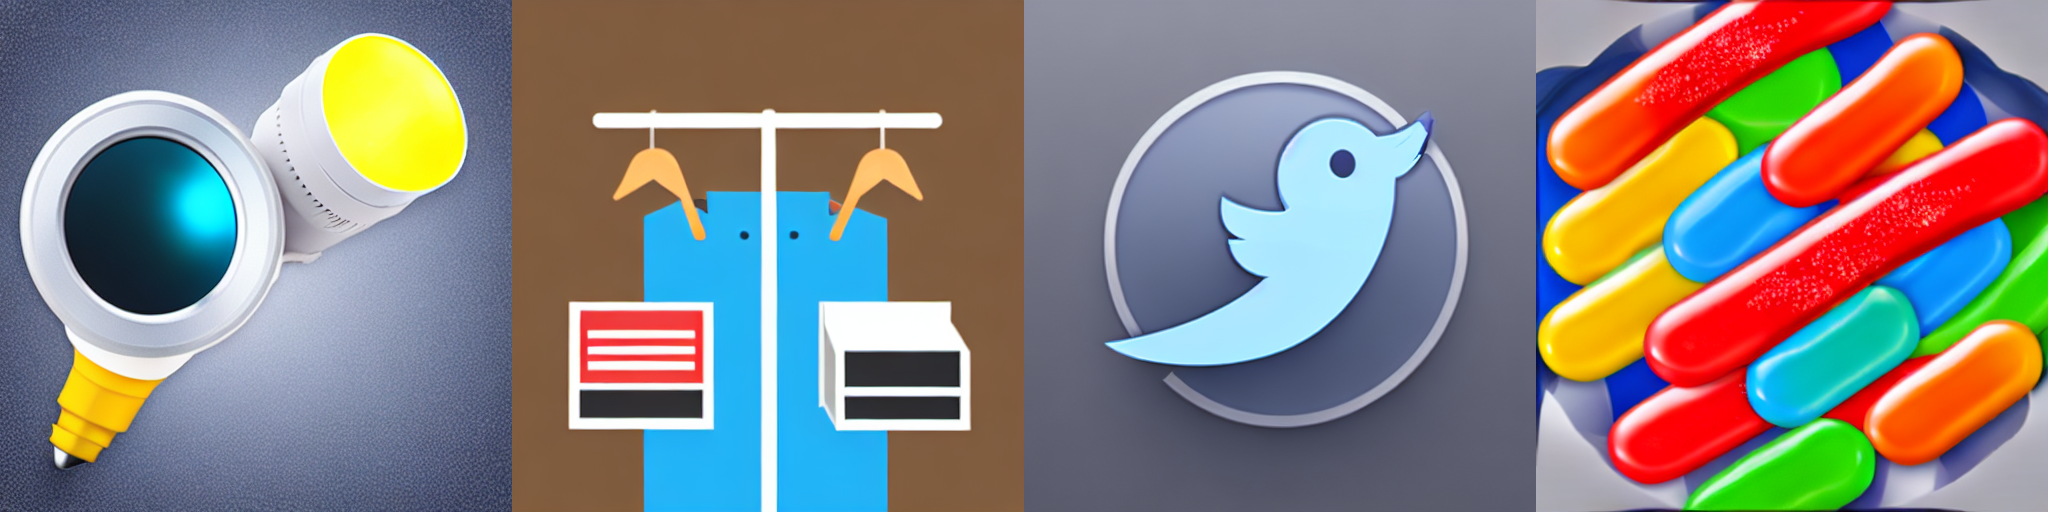

In [ ]:
# Stable Diffusion V1
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_path = "./sd_aiconos-model-v1-2_400"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="flashlight iOS icon").images[0]
image1.save("aiconOS_panel_1.png")

image2 = pipe(prompt="clothing ecommerce business iOS icon").images[0]
image2.save("aiconOS_2.png")

image3 = pipe(prompt="twitter iOS icon").images[0]
image3.save("aiconOS_panel_3.png")

image4 = pipe(prompt="Mike and Ike iOS icon").images[0]
image4.save("aiconOS_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid